# Projeto Final

In [79]:
#Importando Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import unicodedata
import numpy as np

In [80]:
#Limpando Dataset

df = pd.read_csv('vgsales.csv')
df['rank'] = pd.to_numeric(df['rank'],errors = 'coerce')
df['nome'] = df['nome'].str.lower().str.strip()
df['plataforma'] = df['plataforma'].str.lower().str.strip()
df['ano'] = pd.to_numeric(df['ano'],errors = 'coerce')
df['genero'] = df['genero'].str.lower().str.strip()
df['vendas_na'] = pd.to_numeric(df['vendas_na'],errors = 'coerce')
df['vendas_eu'] = pd.to_numeric(df['vendas_eu'],errors = 'coerce')
df['vendas_jp'] = pd.to_numeric(df['vendas_jp'],errors = 'coerce')
df['outras_vendas'] = pd.to_numeric(df['outras_vendas'],errors = 'coerce')
df['vendas_global'] = pd.to_numeric(df['vendas_global'],errors = 'coerce')
df = df.dropna(subset = ['rank', 'nome', 'plataforma', 'ano', 'genero', 'vendas_na', 'vendas_eu', 'vendas_jp', 'outras_vendas', 'vendas_global'])
df['ano'] = df['ano'].apply(int).astype(int)

def remover_acentos(texto):
    if isinstance(texto,str):
        normalized = unicodedata.normalize('NFKD',texto)
        return normalized.encode('ascii','ignore').decode('utf-8')
    return texto

#retirando acentos e cedilhas dos dados

for coluna in df.columns:
    df[coluna] = df[coluna].apply(remover_acentos)

df.head()

,rank,nome,plataforma,ano,genero,editor,vendas_na,vendas_eu,vendas_jp,outras_vendas,vendas_global
0,1,wii sports,wii,2006,sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,super mario bros.,nes,1985,platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,mario kart wii,wii,2008,racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,wii sports resort,wii,2009,sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,pokemon red/pokemon blue,gb,1996,role-playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Pergunta: O gênero mais vendido mundialmente é o mesmo das regiões (EU, NA, JP)

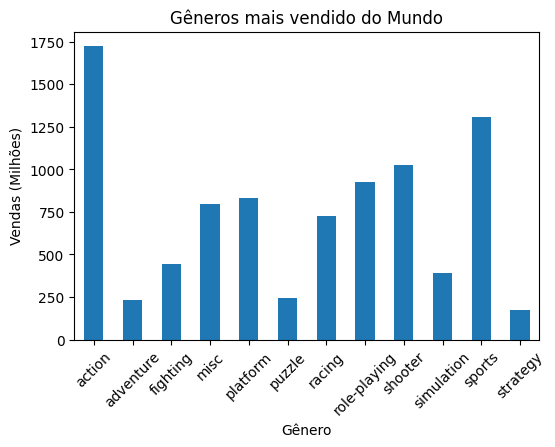

In [81]:
# Fazendo gráfico Global

mundo = df.groupby('genero')['vendas_global'].sum()

plt.figure(figsize = (6,4))
mundo.plot(kind = 'bar', color = 'tab:blue')
plt.title('Gêneros mais vendido do Mundo')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas (Milhões)')
plt.show()

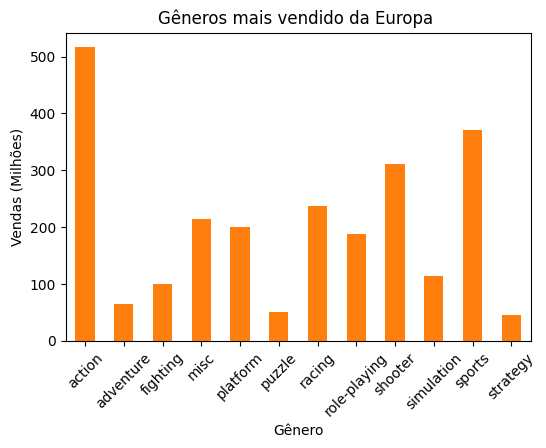

In [82]:
# Fazendo grafico Europeu

europa = df.groupby('genero')['vendas_eu'].sum()

plt.figure(figsize = (6,4))
europa.plot(kind = 'bar', color = 'tab:orange')
plt.title('Gêneros mais vendido da Europa ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas (Milhões)')
plt.show()

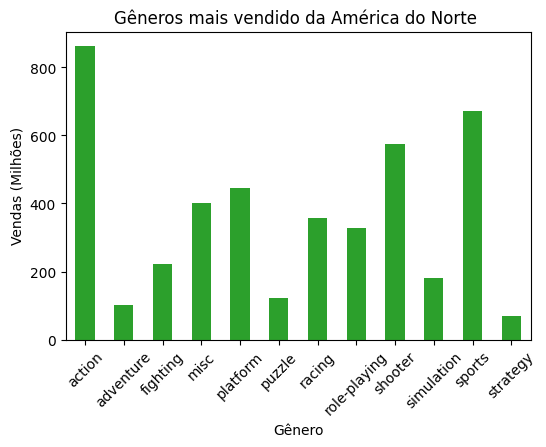

In [83]:
# Fazendo grafico América do Norte

norte_america = df.groupby('genero')['vendas_na'].sum()

plt.figure(figsize = (6,4))
norte_america.plot(kind = 'bar', color = 'tab:green')
plt.title('Gêneros mais vendido da América do Norte ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas (Milhões)')
plt.show()

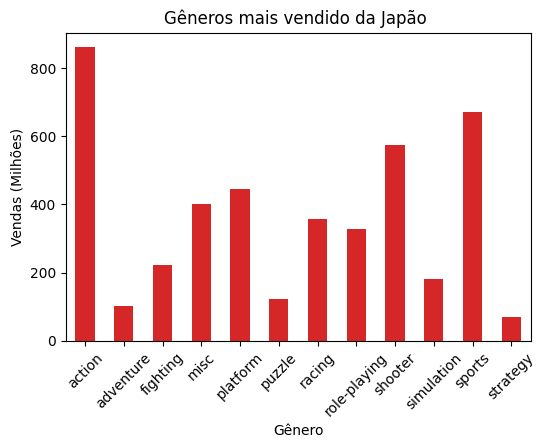

In [84]:
# Fazendo grafico Japão

japao = df.groupby('genero')['vendas_jp'].sum()

plt.figure(figsize = (6,4))
norte_america.plot(kind = 'bar', color = 'tab:red')
plt.title('Gêneros mais vendido da Japão ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas (Milhões)')
plt.show()

### Conclusão: Mesmo sendo regiões diferentes os gráficos são bem semelhantes, mas tem três que se destacam bastante que é Action, Shooter e sports. Nessa situação seria causalidade, porque esses gêneros se destacam tanto do demais no gráfico, que não faria sentido ter um resultado diferente nos gráficos das demais regiões

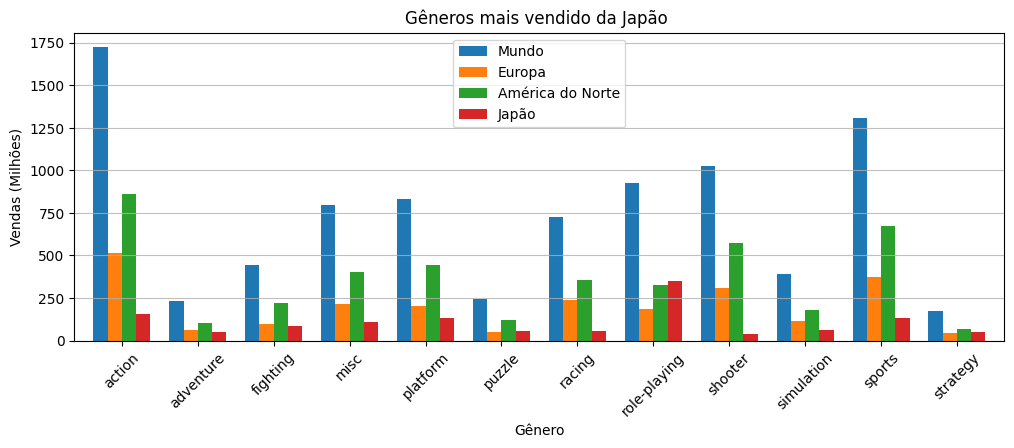

In [ ]:
#Grafico com todos 

df_plot = pd.DataFrame({'Mundo': mundo,'Europa': europa,'América do Norte': norte_america,'Japão': japao})
df_plot.plot(kind='bar', figsize=(12,4), width = 0.75)
plt.title('Gêneros mais vendido da Japão ')
plt.xlabel('Gênero')
plt.xticks(rotation=45)
plt.ylabel('Vendas (Milhões)')
plt.grid(True, axis='y', alpha = 0.8)
plt.show()

- ### Obs: Mesmo que os jogos japoneses são os mais vendidos o jãpao foi quase sempre o que teve menos vendas